In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Definir la transformación para normalizar los datos
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

# Cargar el conjunto de datos CIFAR-10
trainset = torchvision.datasets.CIFAR10(
    root="./data", train=True, download=True, transform=transform
)
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=64, shuffle=True, num_workers=2
)

testset = torchvision.datasets.CIFAR10(
    root="./data", train=False, download=True, transform=transform
)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=64, shuffle=False, num_workers=2
)

# Definir la arquitectura del modelo
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.fc1 = nn.Linear(64 * 6 * 6, 128)
        self.fc2 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = x.view(-1, 64 * 6 * 6)
        x = nn.functional.relu(self.fc1(x))
        x = self.dropout(x)
        x = nn.functional.softmax(self.fc2(x), dim=1)
        return x

# Instanciar el modelo y definir la función de pérdida y el optimizador
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
# Entrenar el modelo
train_losses = []
test_losses = []
train_accuracy = []
test_accuracy = []

for epoch in range(10):
    running_loss = 0.0
    correct = 0
    total = 0
    
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # calcular el train loss, train accuracy, test loss y test accuracy
    train_loss = running_loss / len(trainloader)
    train_losses.append(train_loss)
    train_acc = 100 * correct / total
    train_accuracy.append(train_acc)

    correct = 0
    total = 0
    test_loss = 0.0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # calcular el test loss y test accuracy
    test_loss = test_loss / len(testloader)
    test_losses.append(test_loss)
    test_acc = 100 * correct / total
    test_accuracy.append(test_acc)

    # imprimir el progreso del entrenamiento
    print(f'Epoch {epoch+1} -- Training Loss: {train_loss:.3f}, Training Accuracy: {train_acc:.2f}%, Test Loss: {test_loss:.3f}, Test Accuracy: {test_acc:.2f}%')

Files already downloaded and verified
Files already downloaded and verified
Epoch 1 -- Training Loss: 2.302, Training Accuracy: 12.51%, Test Loss: 2.301, Test Accuracy: 14.62%
Epoch 2 -- Training Loss: 2.300, Training Accuracy: 15.98%, Test Loss: 2.299, Test Accuracy: 16.99%
Epoch 3 -- Training Loss: 2.296, Training Accuracy: 17.25%, Test Loss: 2.292, Test Accuracy: 16.71%
Epoch 4 -- Training Loss: 2.282, Training Accuracy: 17.22%, Test Loss: 2.266, Test Accuracy: 18.27%
Epoch 5 -- Training Loss: 2.248, Training Accuracy: 20.57%, Test Loss: 2.230, Test Accuracy: 22.36%
Epoch 6 -- Training Loss: 2.218, Training Accuracy: 23.69%, Test Loss: 2.206, Test Accuracy: 24.58%
Epoch 7 -- Training Loss: 2.195, Training Accuracy: 25.82%, Test Loss: 2.182, Test Accuracy: 27.15%
Epoch 8 -- Training Loss: 2.173, Training Accuracy: 28.22%, Test Loss: 2.161, Test Accuracy: 29.40%
Epoch 9 -- Training Loss: 2.156, Training Accuracy: 30.12%, Test Loss: 2.146, Test Accuracy: 31.37%
Epoch 10 -- Training Los

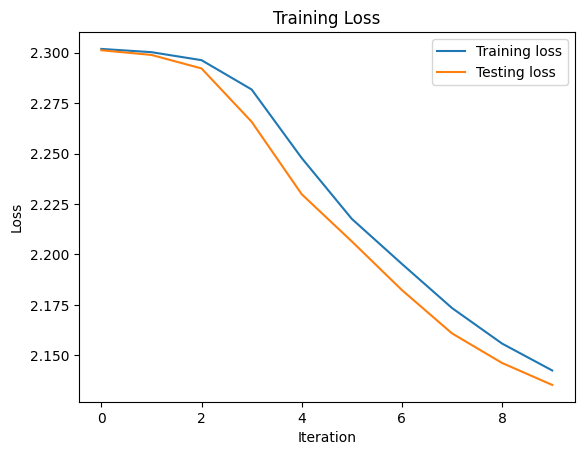

In [15]:
import matplotlib.pyplot as plt

# Graficar el loss
plt.plot(train_losses , label='Training loss')
plt.plot(test_losses , label='Testing loss')
plt.title('Training Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()



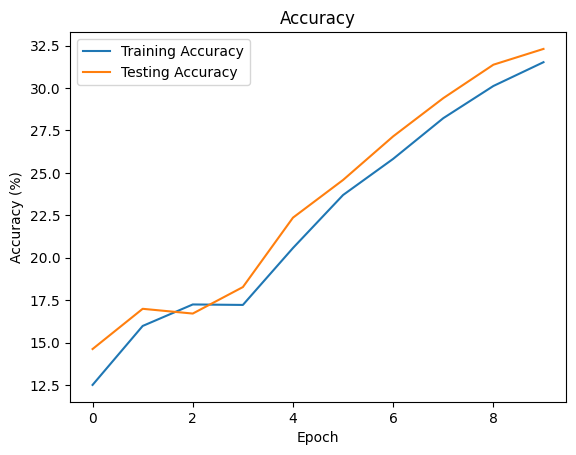

In [16]:

# Graficar la accuracy
plt.plot(train_accuracy , label='Training Accuracy')
plt.plot(test_accuracy , label='Testing Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()

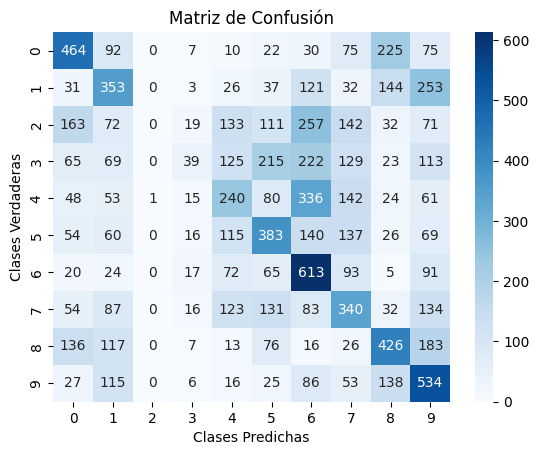

In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Obtener las predicciones del modelo en el conjunto de prueba
net.eval() # Asegurarse de que el modelo está en modo evaluación
y_pred = []
y_true = []
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        y_pred.extend(predicted.numpy())
        y_true.extend(labels.numpy())

# Convertir las predicciones y las etiquetas verdaderas a una lista de etiquetas numéricas
y_pred = np.array(y_pred)
y_true = np.array(y_true)

# Calcular la matriz de confusión
cm = confusion_matrix(y_true, y_pred)

# Visualizar la matriz de confusión
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Matriz de Confusión")
plt.xlabel("Clases Predichas")
plt.ylabel("Clases Verdaderas")
plt.show()
